#  Importing Data in Python I
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from sas7bdat import SAS7BDAT
from sqlalchemy import create_engine
import pickle

# Import the course datasets
titanic = pd.read_csv("datasets/titanic_sub.csv")
battledeath_2002 = pd.ExcelFile("datasets/battledeath.xlsx").parse("2002")
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
con = engine.connect()
rs = con.execute('SELECT * FROM Album')
chinook = pd.DataFrame(rs.fetchall())
seaslug = np.loadtxt("datasets/seaslug.txt", delimiter="\t", dtype=str)

## Explore Datasets
Try importing the remaining files to explore the data and practice your skills!
- `datasets/disarea.dta`
- `datasets/ja_data2.mat`
- `datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5`
- `datasets/mnist_kaggle_some_rows.csv`
- `datasets/sales.sas7bdat`

## Introduction and flat files

In this chapter, you'll learn how to import data into Python from all types of flat files, which are a simple and prevalent form of data storage. You've previously learned how to use NumPy and pandas—you will learn how to use these packages to import flat files and customize your imports.

### Importing Entire Text Files
```python
# Open a file: file
file = open('moby_dick.txt', 'r')

# Print it
print(file)

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If they but knew
it, almost all men in their degree, some time or other, cherish very
nearly the same feelings towards the ocean with me.
False
True
```

### Context Manager w/Open
```python
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())
    
<script.py> output:
    CHAPTER 1. Loomings.
    
    
    
    Call me Ishmael. Some years ago--never mind how long precisely--having
```

### Using NumPy to import flat files
In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function loadtxt() and see just how easy it can be:

The first argument will be the filename.
The second will be the delimiter which, in this case, is a comma.

<class 'numpy.ndarray'>


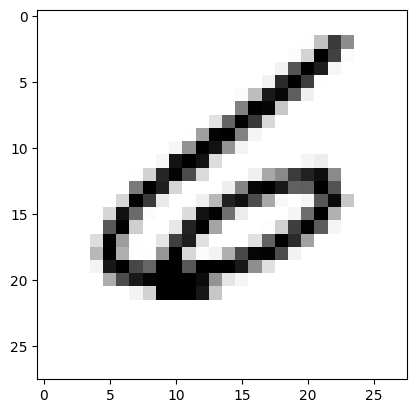

In [2]:
file = 'datasets/mnist_kaggle_some_rows.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### Customizing your NumPy import
What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that np.loadtxt() takes that you'll find useful:

* **delimiter** changes the delimiter that loadtxt() is expecting.
* You can use ',' for comma-delimited.
* You can use '\t' for tab-delimited.
* skiprows allows you to specify how many rows (not indices) you wish to skip
* usecols takes a list of the indices of the columns you wish to keep.

#### Exercise
* Complete the arguments of np.loadtxt(): the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.
* Complete the argument of the print() call in order to print the entire array that you just imported.

```python
# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data : the file you're importing is tab-delimited
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])

# Print data
print(data)
[[1. 0.]
 [2. 0.]
 [0. 0.]
 [5. 0.]]
```

### Importing different datatypes
The file seaslug.txt has 
* a text header, consisting of strings
* is tab-delimited.
* 
These data consists of percentage of sea slug larvae that had metamorphosed in a given time period.

Due to the header, if you tried to import it as-is using np.loadtxt(), Python would throw you a `ValueError` and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to str (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows argument.

['Time' 'Percent']
[0.    0.357]


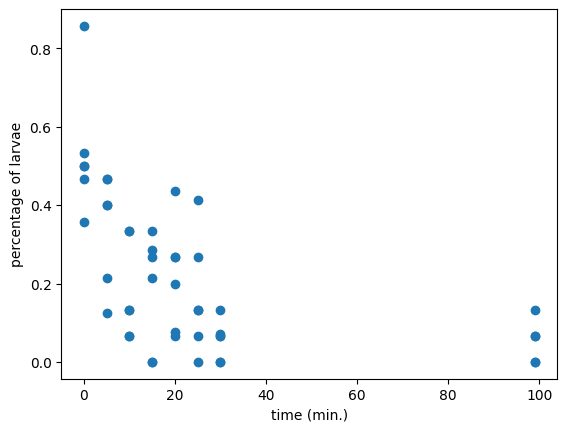

In [3]:
file = 'datasets/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### Working with mixed datatypes (1)
Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function **np.loadtxt()** will freak at this. There is another function, **np.genfromtxt()**, which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function np.genfromtxt() 
Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different type

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute data[i] and to get the column with name 'Fare', execute data['Fare'].

In [4]:
data = np.genfromtxt('datasets/titanic_sub.csv', delimiter=',', names=True, dtype=None)
print(data[:5], '\n')

# Sweet the names ingestion from the genfromt txt allows to index similar to a dataframe
print(data['Fare'][:5])

# After importing the Titanic data as a structured array (as per the instructions above), print the entire column with the name Survived to the shell. What are the last 4 values of this column?

last_4_survived = data['Survived'][-4:]
print(last_4_survived)

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')
 (4, 1, 1, b'female', 35., 1, 0, b'113803', 53.1   , b'C123', b'S')
 (5, 0, 3, b'male', 35., 0, 0, b'373450',  8.05  , b'', b'S')] 

[ 7.25   71.2833  7.925  53.1     8.05  ]
[1 0 1 0]


### Working with mixed datatypes (2)
You have just used np.genfromtxt() to import data containing mixed datatypes. There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.

In [5]:
# Import file using np.recfromcsv: d
d = np.recfromcsv('datasets/titanic_sub.csv', delimiter=',', names=True, dtype=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


### Using pandas to import flat files as DataFrames (1)

In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the DataFrame object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions read_csv() and read_table().

In [6]:
# Read the file into a DataFrame: df
df = pd.read_csv('datasets/titanic_sub.csv')

# View the head of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0            1         0       3  ...   7.2500    NaN         S
1            2         1       1  ...  71.2833    C85         C
2            3         1       3  ...   7.9250    NaN         S
3            4         1       1  ...  53.1000   C123         S
4            5         0       3  ...   8.0500    NaN         S

[5 rows x 11 columns]


### Using pandas to import flat files as DataFrames (2)
In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the attribute values. You'll now have a chance to do this using the MNIST dataset, which is available as digits.csv.

In [7]:
# Assign the filename: file
file = 'datasets/mnist_kaggle_some_rows.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array), data_array.shape)

<class 'numpy.ndarray'> (5, 785)


### Customizing your pandas import
The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which

contains comments after the character '#'
is tab-delimited.

* Complete the sep (the pandas version of delim), comment and na_values arguments of pd.read_csv(). comment takes characters that comments occur after in the file, which in this case is '#'. na_values takes a list of strings to recognize as NA/NaN, in this case the string 'Nothing'.

```python
# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

<script.py> output:
       PassengerId  Survived  Pclass     Sex   Age  ...  Parch            Ticket    Fare  Cabin Embarked
    0            1         0       3    male  22.0  ...      0         A/5 21171   7.250    NaN       S 
    1            2         1       1  female  38.0  ...      0          PC 17599     NaN    NaN      NaN
    2            3         1       3  female  26.0  ...      0  STON/O2. 3101282   7.925    NaN        S
    3            4         1       1  female  35.0  ...      0            113803  53.100   C123        S
    4            5         0       3    male  35.0  ...      0            373450   8.050    NaN        S
    
[5 rows x 11 columns]
```

## Importing data from other file types

In this chapter, you'll learn how to import data into Python from a wide array of important file types. These include pickled files, Excel spreadsheets, SAS and Stata files, HDF5 files, a file type for storing large quantities of numerical data, and MATLAB files

### Loading a pickled file
There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can **serialize** them. All this means is converting the object into a sequence of bytes, or a bytestream.

```python
# Import pickle package
import pickle 

# Open pickle file and load data: d one signifying 'read only', the other 'binary'.
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))


{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>
```


### Listing sheets in Excel files
Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

In [8]:
# Assign spreadsheet filename: file
file = 'datasets/battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(dir(xls), '\n', xls.sheet_names)


['ODFReader', 'OpenpyxlReader', 'PyxlsbReader', 'XlrdReader', '__annotations__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__fspath__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_engines', '_io', '_reader', 'book', 'close', 'engine', 'io', 'parse', 'sheet_names', 'storage_options'] 
 ['2002', '2004']


In [9]:
help(xls.parse)

Help on method parse in module pandas.io.excel._base:

parse(sheet_name: 'str | int | list[int] | list[str] | None' = 0, header: 'int | Sequence[int] | None' = 0, names=None, index_col: 'int | Sequence[int] | None' = None, usecols=None, squeeze: 'bool | None' = None, converters=None, true_values: 'Iterable[Hashable] | None' = None, false_values: 'Iterable[Hashable] | None' = None, skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None, nrows: 'int | None' = None, na_values=None, parse_dates: 'list | dict | bool' = False, date_parser: 'Callable | None' = None, thousands: 'str | None' = None, comment: 'str | None' = None, skipfooter: 'int' = 0, convert_float: 'bool | None' = None, mangle_dupe_cols: 'bool' = True, **kwds) -> 'DataFrame | dict[str, DataFrame] | dict[int, DataFrame]' method of pandas.io.excel._base.ExcelFile instance
    Parse specified sheet(s) into a DataFrame.
    
    Equivalent to read_excel(ExcelFile, ...)  See the read_excel
    docstring for more in

In [10]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse(sheet_name='2004')

print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(sheet_name=0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [11]:
# Parse the first sheet by index. In doing so, skip the first row of data and name the columns 'Country' and 'AAM due to War (2002)' using the argument names. The values passed to skiprows and names all need to be of type list.
df1 = xls.parse(sheet_name=0, skiprows=[1], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head(), '\n')

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(sheet_name=1, usecols=[0], skiprows=[1], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())


               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000 

               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


### SAS7BDAT

How to import SAS7BDAT
How do you correctly import the function SAS7BDAT() from the package sas7bdat?

* from sas7bdat import SAS7BDAT

#### Importing SAS  Files

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


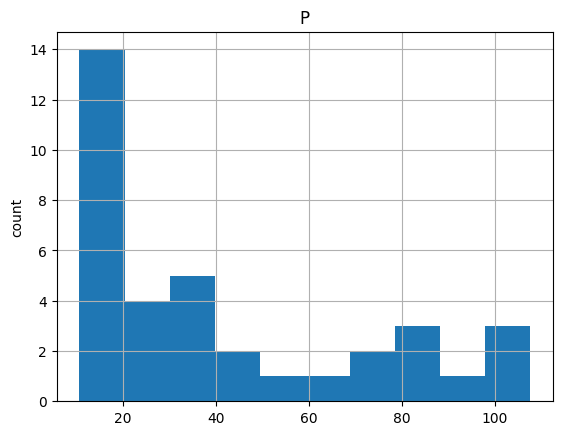

In [12]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

#### read_stata to import Stata Files
What is the correct way of using the read_stata() function to import disarea.dta into the object df?

* df = pd.read_stata('disarea.dta')

  wbcode               country  disa1  disa2  ...  disa22  disa23  disa24  disa25
0    AFG           Afghanistan   0.00   0.00  ...    0.00    0.02    0.00    0.00
1    AGO                Angola   0.32   0.02  ...    0.99    0.98    0.61    0.00
2    ALB               Albania   0.00   0.00  ...    0.00    0.00    0.00    0.16
3    ARE  United Arab Emirates   0.00   0.00  ...    0.00    0.00    0.00    0.00
4    ARG             Argentina   0.00   0.24  ...    0.00    0.01    0.00    0.11

[5 rows x 27 columns]


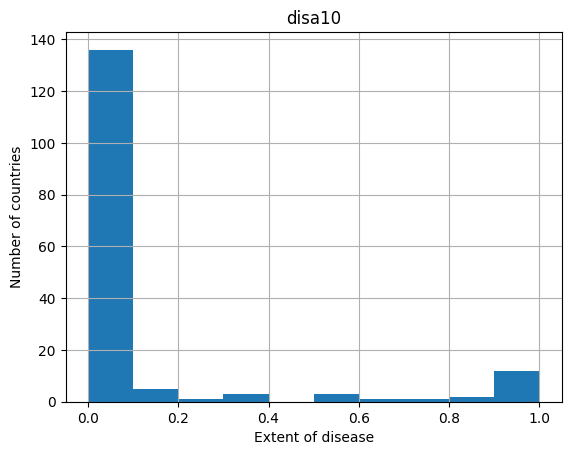

In [13]:
df = pd.read_stata('datasets/disarea.dta')

print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

### Using File to import HDF5 files
The h5py package has been imported in the environment and the file LIGO_data.hdf5 is loaded in the object h5py_file.

What is the correct way of using the h5py function, File(), to import the file in h5py_file into an object, h5py_data, for reading only?

* h5py_data = h5py.File(h5py_file, 'r')


```python
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)
    
<class 'h5py._hl.files.File'>
meta
quality
strain
```

#### Extracting data from your HDF5 file
In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group 'strain'.

```python
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)
```

### Loading .mat files
* Keys/Value type structure resembling a dictionary


```python
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>
```

#### Structure of .mat files
```python
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(mat['CYratioCyt'].shape)

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)
```

### Creating a database engine in Python

```python
from sqlalchemy  import create_engine
engine = create_engine('sqlite:///Northwind.sqlite')

table_names = engine.table_names()
# Returns list of tables in database engine
```

In [20]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

print(type(engine), dir(engine))

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

# hey guess there's nothing in the table

<class 'sqlalchemy.engine.base.Engine'> ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_compiled_cache', '_connection_cls', '_echo', '_execute_clauseelement', '_execute_compiled', '_execute_default', '_execution_options', '_has_events', '_is_future', '_lru_size_alert', '_option_cls', '_optional_conn_ctx_manager', '_run_ddl_visitor', '_run_visitor', '_schema_translate_map', '_should_log_debug', '_should_log_info', '_sqla_logger_namespace', '_trans_ctx', '_wrap_pool_connect', 'begin', 'clear_compiled_cache', 'connect', 'dialect', 'dispatch', 'dispose', 'driver', 'echo', 'engine', 'execute', 'execution_options', 'get_execution_options', 'has_table', 'hide_parameters', 'logger', 'logging_name', '

### Querying a relational database
* Using the Context Manager

```python
from sqlalchemy import create_engine
import pandas as pd 
engine = create_engine('sqlite:///Chinook.sqlite')

# Context Manager
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Orders')
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()
    
    
# Without
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute('SELECT * FROM Album')

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

<script.py> output:
       0                                      1  2
    0  1  For Those About To Rock We Salute You  1
    1  2                      Balls to the Wall  2
    2  3                      Restless and Wild  2
    3  4                      Let There Be Rock  1
    4  5                               Big Ones  3
```

```python
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent
```

#### Querying relational databases directly with pandas
* pd.read_sql_query method

```python
from sqlalchemy import create_engine
import pandas as pd 
engine = create_engine('sqlite:///Chinook.sqlite')

# Context Manager
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Orders')
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()
 
# With method
df = pd.read_sql_query('SELECT * FROM Orders', engine)
```

#### Exercise
```python
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Album', engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True
```


```python
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
                        """
                        SELECT * 
                        FROM Employee
                        WHERE EmployeeId >= 6
                        ORDER BY BirthDate
                        """, engine)

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo  ... Country PostalCode              Phone                Fax                    Email
0           8  Callahan     Laura    IT Staff          6  ...  Canada    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com
1           7      King    Robert    IT Staff          6  ...  Canada    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com
2           6  Mitchell   Michael  IT Manager          1  ...  Canada    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com

[3 rows x 15 columns]
```

* JOIN ON OTHER TABLES
```python
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

<script.py> output:
                                       Title       Name
    0  For Those About To Rock We Salute You      AC/DC
    1                      Balls to the Wall     Accept
    2                      Restless and Wild     Accept
    3                      Let There Be Rock      AC/DC
    4                               Big Ones  Aerosmith
```

* Filtering Join
```python
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("""
SELECT *
FROM PlaylistTrack
INNER JOIN Track
ON PlaylistTrack.TrackId = Track.TrackId
WHERE Track.Milliseconds < 250000
""", engine)

# Print head of DataFrame
print(df.head())

<script.py> output:
       PlaylistId  TrackId  TrackId              Name  AlbumId  ...  GenreId  Composer Milliseconds    Bytes  UnitPrice
    0           1     3390     3390  One and the Same      271  ...       23      None       217732  3559040       0.99
    1           1     3392     3392     Until We Fall      271  ...       23      None       230758  3766605       0.99
    2           1     3393     3393     Original Fire      271  ...       23      None       218916  3577821       0.99
    3           1     3394     3394       Broken City      271  ...       23      None       228366  3728955       0.99
    4           1     3395     3395          Somedays      271  ...       23      None       213831  3497176       0.99
    
    [5 rows x 11 columns]
```